In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'historic_demand_year_2024.csv'
data = pd.read_csv(file_path)

data.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
0,2024-01-01,1,21783,23466,19539,2804,6488,0,16726,0,...,-71,417,-4,666,-179,-92,905,62,998,572
1,2024-01-01,2,22521,24103,20286,2834,6488,0,16726,0,...,288,430,-4,661,-60,-8,901,-15,998,575
2,2024-01-01,3,22194,24754,20070,2868,6488,0,16726,0,...,466,834,-4,661,-118,-1,807,-396,997,422
3,2024-01-01,4,21510,24505,19424,2901,6488,0,16726,0,...,262,839,-4,661,-270,-84,803,-473,997,401
4,2024-01-01,5,20619,23977,18674,2933,6488,0,16726,0,...,595,53,-5,661,-340,-103,537,-856,998,28


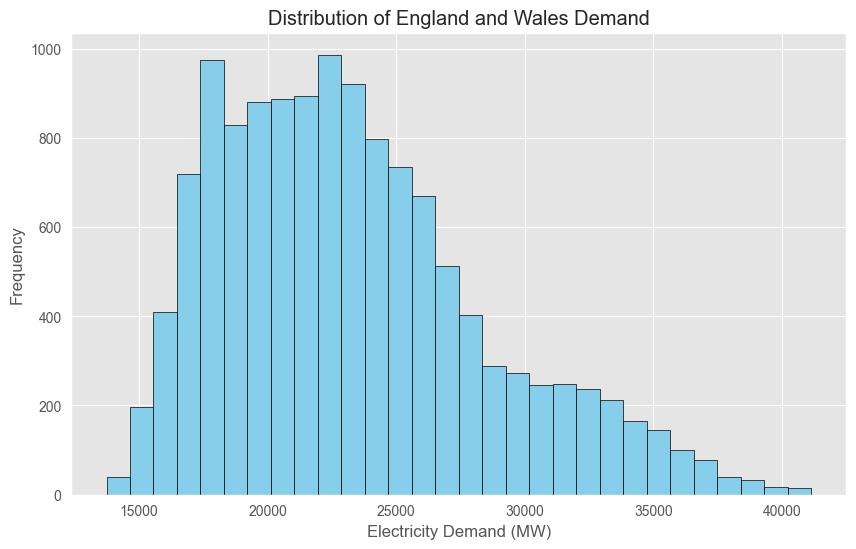

In [2]:
# 1. Histogram of England and Wales demand
plt.style.use('ggplot')
def plot_histogram_england_wales_demand(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data['england_wales_demand'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of England and Wales Demand')
    plt.xlabel('Electricity Demand (MW)')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram_england_wales_demand(data)


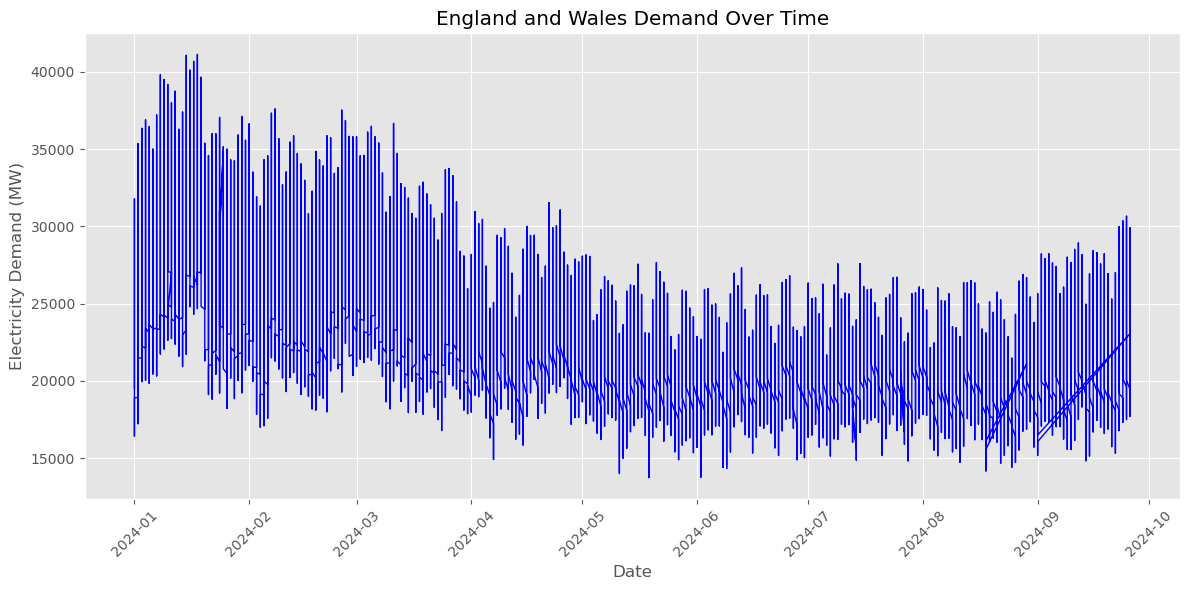

In [40]:
# 2. Line plot showing the England and Wales demand over time
def plot_line_england_wales_demand(data):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(data['settlement_date']), data['england_wales_demand'], color='blue', linewidth=1)
    plt.title('England and Wales Demand Over Time')
    plt.xlabel('Date')
    plt.ylabel('Electricity Demand (MW)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_line_england_wales_demand(data)


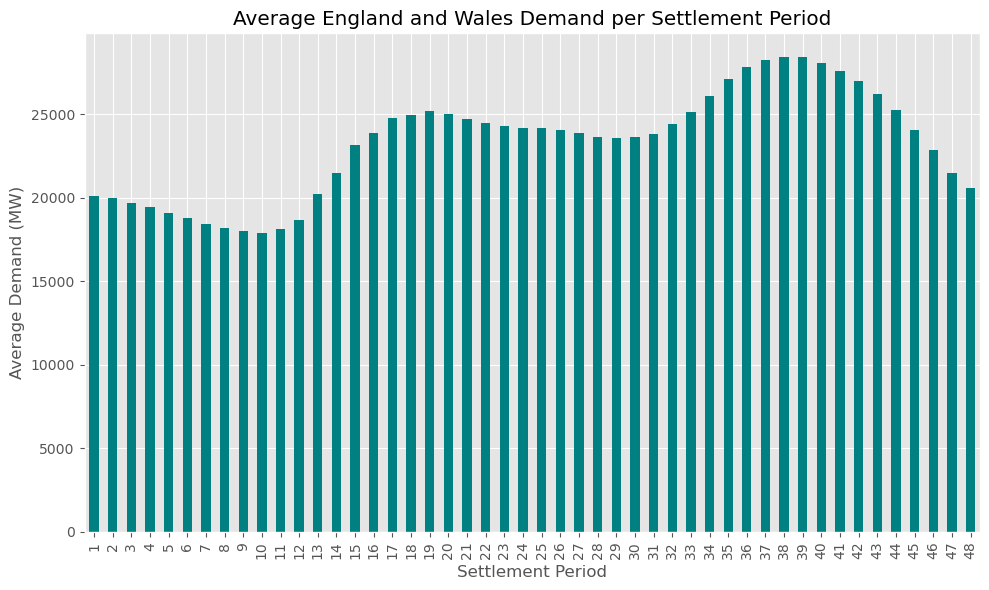

In [41]:
# 3. Bar Chart
def plot_bar_average_demand(data):
    plt.figure(figsize=(10, 6))
    avg_demand = data.groupby('settlement_period')['england_wales_demand'].mean()
    avg_demand.plot(kind='bar', color='teal')
    
    plt.title('Average England and Wales Demand per Settlement Period')
    plt.xlabel('Settlement Period')
    plt.ylabel('Average Demand (MW)')
    plt.tight_layout()
    plt.show()

plot_bar_average_demand(data)

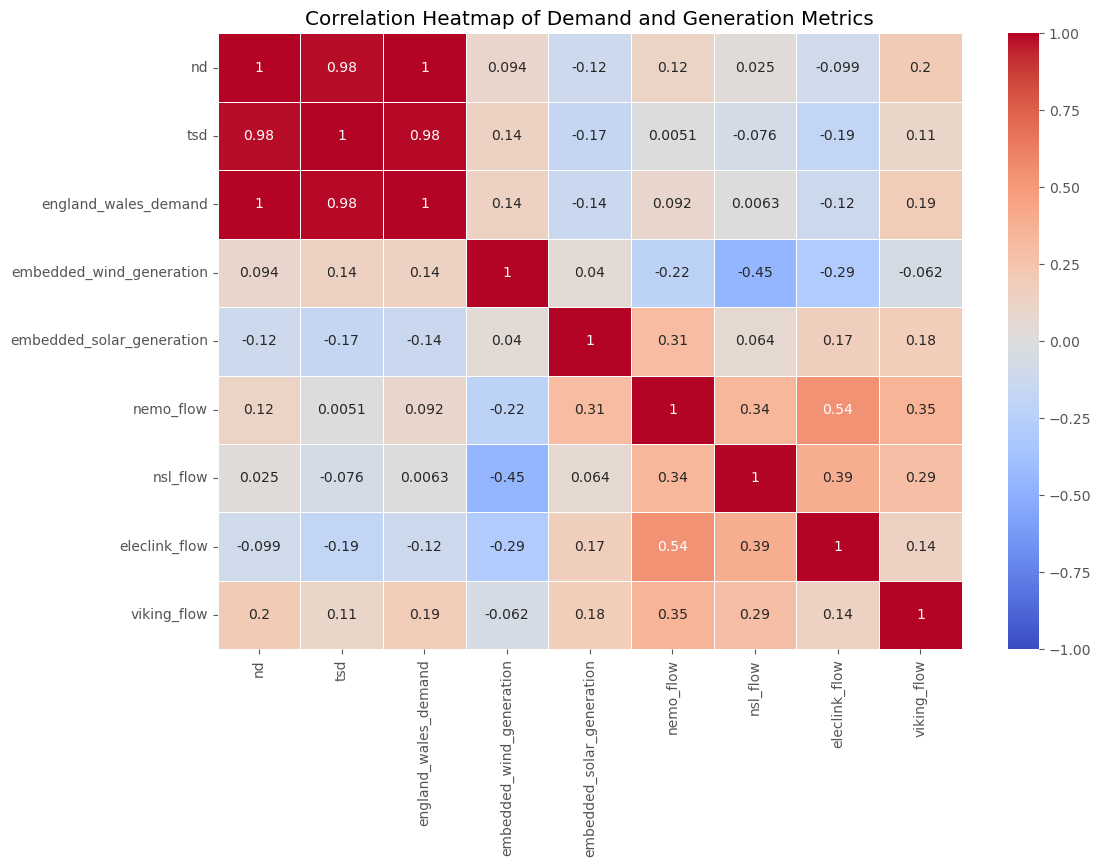

In [42]:
# 4. Heatmap of correlations between demand and generation columns
def plot_heatmap_correlations(data):
    plt.figure(figsize=(12, 8))
    relevant_columns = ['nd', 'tsd', 'england_wales_demand', 
                        'embedded_wind_generation', 'embedded_solar_generation',
                        'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow']
    correlation_matrix = data[relevant_columns].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Heatmap of Demand and Generation Metrics')
    plt.show()

plot_heatmap_correlations(data)


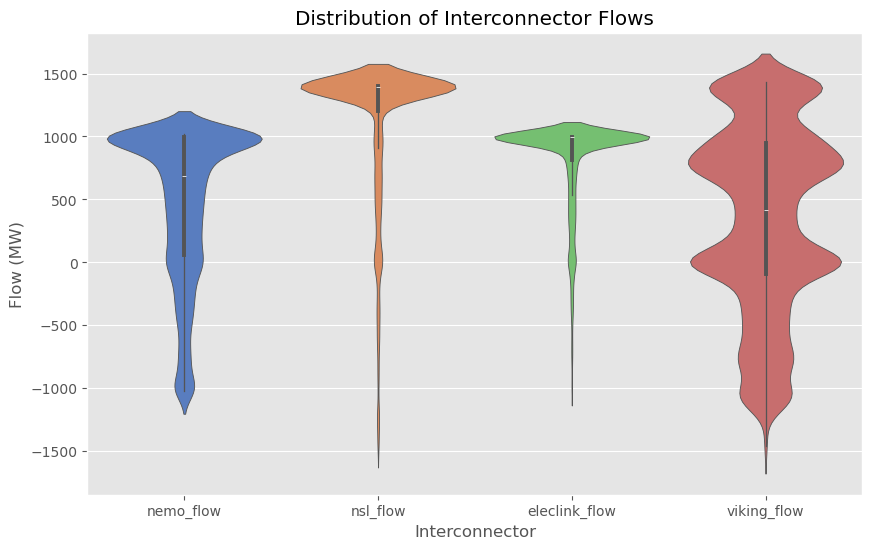

In [43]:
# 5. Violin plot of interconnector flows
def plot_violin_interconnector_flows(data):
    plt.figure(figsize=(10, 6))
    flows = ['nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow']
    flow_data = pd.melt(data, value_vars=flows, var_name='Interconnector', value_name='Flow (MW)')

    sns.violinplot(x='Interconnector', y='Flow (MW)', data=flow_data, hue='Interconnector', 
                   palette='muted', legend=False)
    plt.title('Distribution of Interconnector Flows')
    plt.ylabel('Flow (MW)')
    plt.show()

plot_violin_interconnector_flows(data)


In [44]:
# descriptive statistics
descriptive_stats = data.describe()

# correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_data.corr()

print("Descriptive Statistics:")
print(descriptive_stats)

print("Correlation Matrix:")
print(correlation_matrix)

Descriptive Statistics:
       settlement_period            nd           tsd  england_wales_demand  \
count       12958.000000  12958.000000  12958.000000          12958.000000   
mean           24.496450  25380.683902  27363.541519          23306.837784   
std            13.852054   5644.692266   5439.365444           5173.667562   
min             1.000000  15071.000000  17138.000000          13740.000000   
25%            12.250000  21021.250000  23297.750000          19295.000000   
50%            24.000000  24621.000000  26350.000000          22568.500000   
75%            36.000000  28552.500000  30408.750000          26174.500000   
max            48.000000  45202.000000  47507.000000          41130.000000   

       embedded_wind_generation  embedded_wind_capacity  \
count              12958.000000            12958.000000   
mean                1840.572928             6563.383701   
std                 1169.789444               34.834364   
min                  229.000000      